# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
from sqlalchemy import create_engine
import pandas as pd
import re
from matplotlib import pyplot as plt

# NLP
import nltk
nltk.download(['stopwords','punkt', 'wordnet'])
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Scikit-Learn
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RobertSmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/RobertSmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/RobertSmith/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data from database
engine = create_engine('sqlite:///../data/disaster_response.db')
df = pd.read_sql("SELECT * FROM messages;", con = engine)
X = df["message"]
Y = df[['medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report']]

### 2. Write a tokenization function to process your text data
Tokenization steps:
1. normalize
2. remove punctuation
3. tokenize
4. remove stopwords
5. lemmatize


In [4]:
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^A-Za-z0-9]", " ",text)
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]
    words = [WordNetLemmatizer().lemmatize(w) for w in words]
    return words

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [64]:
pipeline = Pipeline([
    ("vect", CountVectorizer(tokenizer = tokenize)),
    ("tfidf", TfidfTransformer()),
    ("clf", MultiOutputClassifier(RandomForestClassifier()))
    ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [78]:
Y.columns

Index(['medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [66]:
model = pipeline.fit(X_train, y_train)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [58]:
predictions = model.predict(X_test)

In [59]:
predictions.shape

(7865, 31)

In [60]:
predictions[0].dtype

dtype('int64')

In [61]:
report = classification_report(y_test["medical_products"], predictions[:,0])

In [67]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7447
           1       0.76      0.04      0.07       418

    accuracy                           0.95      7865
   macro avg       0.86      0.52      0.52      7865
weighted avg       0.94      0.95      0.93      7865



In [68]:
print(classification_report(y_test, predictions, target_names = y_test.columns))

                        precision    recall  f1-score   support

      medical_products       0.76      0.04      0.07       418
     search_and_rescue       0.83      0.03      0.05       192
              security       0.00      0.00      0.00       144
              military       0.64      0.07      0.12       245
           child_alone       0.00      0.00      0.00         0
                 water       0.87      0.32      0.47       500
                  food       0.89      0.47      0.62       878
               shelter       0.82      0.27      0.41       705
              clothing       0.76      0.11      0.20       115
                 money       0.89      0.05      0.09       170
        missing_people       1.00      0.01      0.02        92
              refugees       0.33      0.02      0.03       260
                 death       0.77      0.06      0.12       366
             other_aid       0.61      0.06      0.12      1033
infrastructure_related       0.00      

/Users/RobertSmith/PycharmProjects/disaster-response-pipeline/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/RobertSmith/PycharmProjects/disaster-response-pipeline/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/RobertSmith/PycharmProjects/disaster-response-pipeline/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division

In [69]:
print(classification_report(y_test, predictions, target_names = y_test.columns))

                        precision    recall  f1-score   support

      medical_products       0.76      0.04      0.07       418
     search_and_rescue       0.83      0.03      0.05       192
              security       0.00      0.00      0.00       144
              military       0.64      0.07      0.12       245
           child_alone       0.00      0.00      0.00         0
                 water       0.87      0.32      0.47       500
                  food       0.89      0.47      0.62       878
               shelter       0.82      0.27      0.41       705
              clothing       0.76      0.11      0.20       115
                 money       0.89      0.05      0.09       170
        missing_people       1.00      0.01      0.02        92
              refugees       0.33      0.02      0.03       260
                 death       0.77      0.06      0.12       366
             other_aid       0.61      0.06      0.12      1033
infrastructure_related       0.00      

In [70]:
f1_score(y_test[["medical_products"]], predictions[:,0], pos_label = 1)

0.07289293849658314

In [73]:
f1_scores = pd.Series(dtype = float)
for col in range(0,predictions.shape[1]):
    print(f"Classification Report for: {y_test.iloc[:,col].name}")
    print(classification_report(y_test.iloc[:,col], predictions[:,col]))
    f1_scores = f1_scores.append(pd.Series(round(f1_score(y_test.iloc[:,col], predictions[:,col], pos_label = 1),2)))
f1_scores.index = y_test.columns
    

Classification Report for: medical_products
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7447
           1       0.76      0.04      0.07       418

    accuracy                           0.95      7865
   macro avg       0.86      0.52      0.52      7865
weighted avg       0.94      0.95      0.93      7865

Classification Report for: search_and_rescue
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7673
           1       0.83      0.03      0.05       192

    accuracy                           0.98      7865
   macro avg       0.90      0.51      0.52      7865
weighted avg       0.97      0.98      0.97      7865

Classification Report for: security
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7721
           1       0.00      0.00      0.00       144

    accuracy                           0.98      7865
   

/Users/RobertSmith/PycharmProjects/disaster-response-pipeline/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7499
           1       0.77      0.06      0.12       366

    accuracy                           0.96      7865
   macro avg       0.86      0.53      0.55      7865
weighted avg       0.95      0.96      0.94      7865

Classification Report for: other_aid
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6832
           1       0.61      0.06      0.12      1033

    accuracy                           0.87      7865
   macro avg       0.74      0.53      0.52      7865
weighted avg       0.84      0.87      0.82      7865

Classification Report for: infrastructure_related
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7360
           1       0.00      0.00      0.00       505

    accuracy                           0.94      7865
   macro avg       0.47      0.50      0.

In [74]:
f1_scores

medical_products          0.07
search_and_rescue         0.05
security                  0.00
military                  0.12
child_alone               0.00
water                     0.47
food                      0.62
shelter                   0.41
clothing                  0.20
money                     0.09
missing_people            0.02
refugees                  0.03
death                     0.12
other_aid                 0.12
infrastructure_related    0.00
transport                 0.02
buildings                 0.07
electricity               0.01
tools                     0.00
hospitals                 0.00
shops                     0.00
aid_centers               0.00
other_infrastructure      0.00
weather_related           0.72
floods                    0.46
storm                     0.47
fire                      0.05
earthquake                0.76
cold                      0.07
other_weather             0.03
direct_report             0.50
dtype: float64

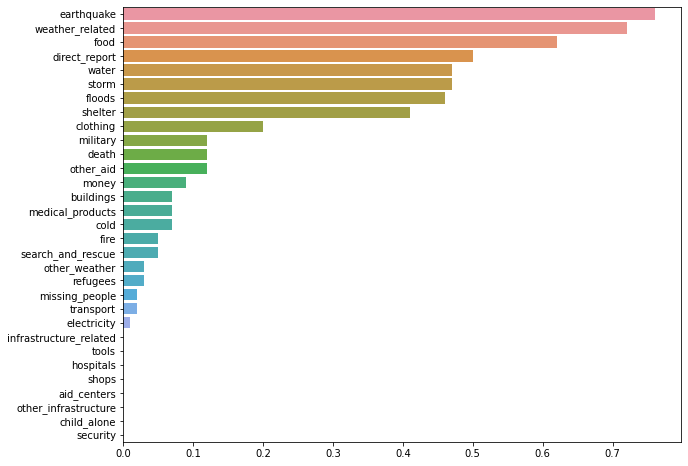

In [75]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x = f1_scores, 
            y = f1_scores.index, 
            order = f1_scores.sort_values(ascending=False).index);

In [76]:
f1_scores.mean()

0.1767741935483871

### 6. Improve your model
Use grid search to find better parameters. 

In [89]:
parameters = {
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000),
    'tfidf__use_idf': (True, False),
    'clf__estimator__n_estimators': [50, 100, 200],
    'clf__estimator__min_samples_split': [2, 3, 4]
}

cv = GridSearchCV(pipeline, param_grid = parameters)

In [ ]:
cv_model = cv.fit(X_train, y_train)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
cv_predictions = cv_model.predict(X_test)

In [ ]:
cv_f1_score_dict = {}
for col in range(0,predictions.shape[1]):
    print(f"Classification Report for: {y_test.iloc[:,col].name}")
    print(classification_report(y_test.iloc[:,col], cv_predictions[:,col]))
    cv_f1_score_dict[y_test.iloc[:,col].name] = round(f1_score(y_test.iloc[:,col], cv_predictions[:,col], pos_label = "1"),2)
  

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.